<a href="https://colab.research.google.com/github/leticiagomescs/QuarentenaDados-Alura/blob/master/Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Aula 02 - Quarentena Dados

Nesta aula vamos estudar com mais profundidade as técnicas de centralidade, conhecer algumas boas práticas de visualização de dados e o famoso Boxplot.

## Bibliotecas

In [0]:
# Processamento/manipulação dos dados:
import pandas as pd

# Visualização dos dados:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Datasets

**Filmes:**

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

# Agora, filmes é um DataFrame
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Avaliações:**

In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ['userId','filmeId','nota','timestamp']
avaliacoes.head()

,userId,filmeId,nota,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Análise Exploratória dos Dados

In [0]:
filmes['generos'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Observando a tabela acima percebemo que a nossa saída é um **DataFrame**, cada linha corresponde a respectiva linha da coluna gênero, cada coluna corresponde a um gênero (repare que cada gênero único virou uma coluna no DF). 

Porém, esse formato não nos dá uma visão muito clara do que esta acontecendo, vamos somar quantos 1 cada coluna tem e colocar essas informações em uma lista com os generos e a quantidade de vezes que eles aparecem.

Nós podemos melhorar nossa lista ainda mais, basta ordenar as informações do maior númo para o menor.


In [0]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [0]:
filmes.values

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [193585, 'Flint (2017)', 'Drama'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)',
        'Action|Animation'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy']],
      dtype=object)

In [0]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [0]:
filmes['generos'].str.get_dummies('|').sum().sort_index(ascending=True).index

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

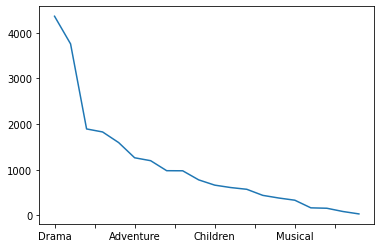

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

**<h3> O que podemos observar com o gráfico acima?** 

O gráfico de linha nesse caso **não faz sentido** pois nossos índeces são categorias.
Para utilizarmos um gráico de linhas precisando que nossos índeces sejam números.

## Data Visualization

***Que tipo de gráfico eu utilizo de acordo com as variáves que tenho e com o que quero encontrar?***

Essa é a principal pergunta em Data Visuaization

### Gráfico de Pizza

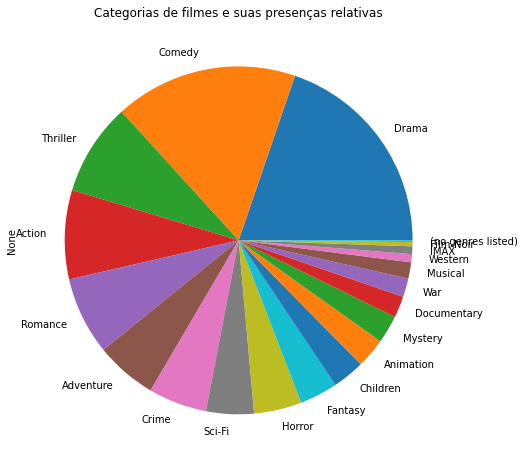

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

O gráfico de pizza também não é o ideal. Pois o cérebro humano têm dificuldade em comparar áreas. Então fica difícil comparar o quão maior um valor é o outro.

####**Não use gáfico com nome de comida!**

  O problema dos gráficos de pizza são algumas limitações de design que ficam óbvias se você prestar atenção:

- São terríveis com valores pequenos:
    - Quando você tem muitas categorias, as que tem valores abaixo de 5% ficam literalmente escondidas.
- Dependem do uso de cor:
    - Quando você tem muitas categorias, você precisa de cores para salientar essas diferenças.Só que é difícil escolher cores de forma eficiente por conta do posicionamento das categorias no gráfico. E um fato importante: 8% da população masculina é daltônica ou sofre de algum tipo de dificuldade em perceber cores. Você vai arriscar usar um gráfico que depende tanto assim de cores?
- Dificultam a comparação direta:
  - Perceber rapidamente a diferença entre valores próximos (ex.: 38% vs 33%) é bem complicado num gráfico de pizza. Faça um teste: remova os labels de um gráfico de pizza e tente adivinhar o percentual. E fica pior quando você quer comparar dados de muitas categorias em momentos diferentes.

![alt text](https://miro.medium.com/max/1400/1*k4edWyQdQ1VYJla1Q_KHeQ.png)

### Gráfico de Barras

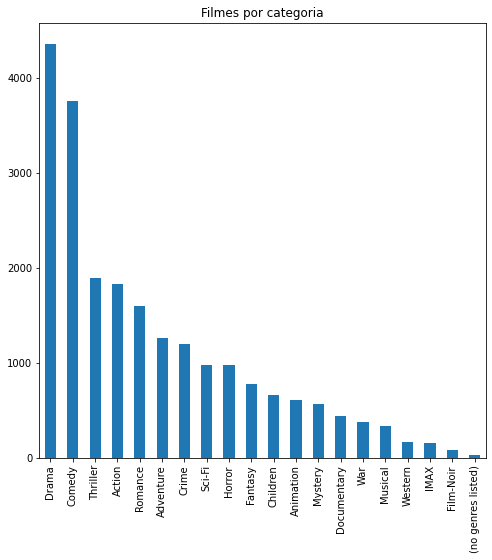

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

### Seaborn Barplot 

In [0]:
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

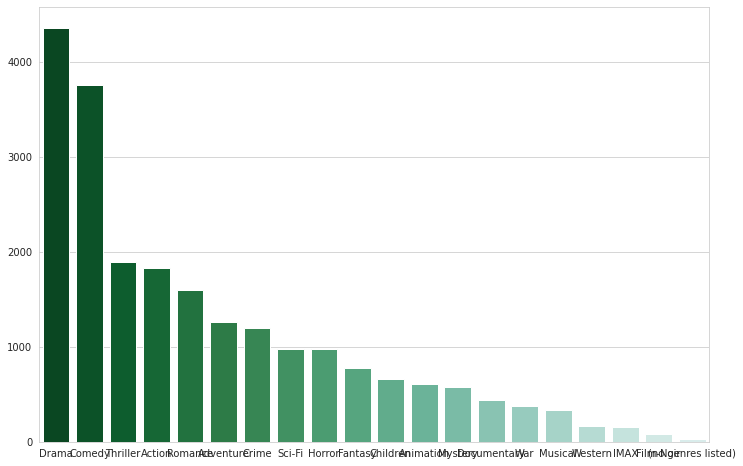

In [0]:
# Configurando o tamanho da figura:
plt.figure(figsize=(12,8))

# Adicionando o grid na figura:
sns.set_style("whitegrid")

# 
sns.barplot(x = filmes_por_genero.index, 
            y = filmes_por_genero.values, 
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4) 
            )

# Plotando o gráfico:
plt.show()


### Seaborn Barplot rotacionado

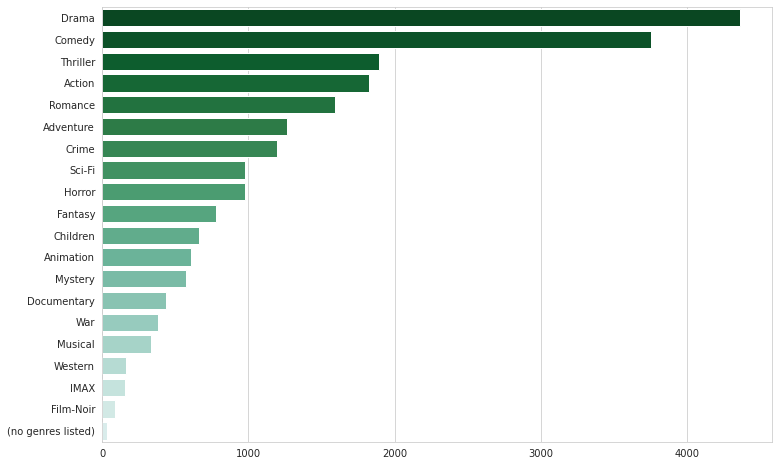

In [0]:
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))

grafico = sns.barplot(x=filmes_por_genero.values,
            y=filmes_por_genero.index,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))


A média é muito perigosa em algumas distribuiçoes. 

3.9209302325581397


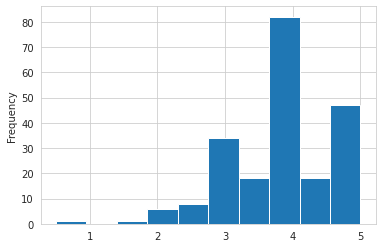

In [0]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


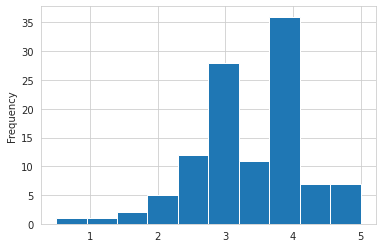

In [0]:
notas_do_filme_2 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist')

In [0]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [0]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

Podemos observar que ToyStory (`filmeId=1`) e Jumanji (`filmeId=2`) possuem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados.

Olhando apenas para as médias dos salários não conseguimos evidênciar a desigualdade que havia entre as cidades.

In [0]:
avaliacoes.groupby('filmeId').mean()

,userId,nota,timestamp
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Outras métricas que podem nos ajudar a interpretar melhor os dados são os quatis, principalmente a mediana.

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = pd.DataFrame(filmes.join(notas_medias_por_filme, on="filmeId")) 
filmes_com_media.columns = ['filmeID','titulo','generos','nota_media']
filmes_com_media.head(2)

,filmeID,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818


In [0]:
filmes_com_media.sort_values('nota_media', ascending=False)[2450:2500]

,filmeID,titulo,generos,nota_media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


Bom, ordenando os filmes pela nota médias e fatiando os dados entre 2450 e 2500, temos uma região onde as médias são semelhates e provavelmente não tem apenas um único voto. Vamos comparar o fime Wizard of Oz, filmeId=919 e *Little Miss Sunshine filmeId=46578.

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar nossa primeira função, assim passamos apenas o FilmeId e temos as informações desejadas.

In [0]:
def plota_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

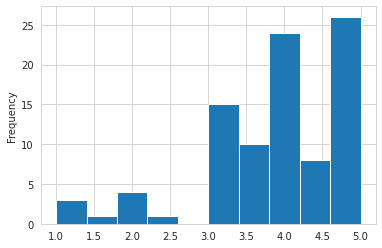

In [0]:
plota_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

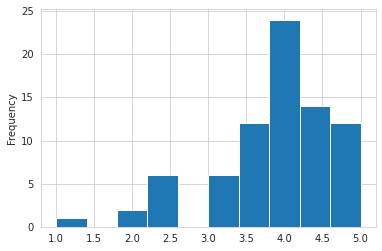

In [0]:
plota_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1). Quando comparamos com a histograma temos um do **Little mis sunshine**, percebemos que os resultados se concentra entre valores medianos(notas 2.5-4). 

O que confirma nossa análise aqui é comparar os **25% 50% e 75%**. 50% é o valor da mediana, e ambos filmes tem mesma mediana, mas 25% e 75% são diferentes. Se você lembra lá da estatísitca esses são os [**1° 2° e 3° quartis**](https://pt.wikipedia.org/wiki/Quartil). 

Olha, mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor, o gráfico que nos ajuda neste caso é o **Boxplot**. Vamos adaptar nossa função para conseguir plotar o boxplot e interpretá-lo.

### Boxplot

In [0]:
def plota_filme2(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')["nota"]
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

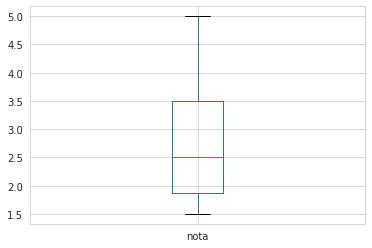

count    4.000000
mean     2.875000
std      1.547848
min      1.500000
25%      1.875000
50%      2.500000
75%      3.500000
max      5.000000
Name: nota, dtype: float64

In [0]:
plota_filme2(2050)

E aí, viu como é simples criar criar um [boxplot com o pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)?

Apenas chamamos o método ```.plot.box()```, agora o que precisamos fazer é interpretar este gráfico.

Vamos focar primeiro na "caixa" a linha verde que divide a caixa em dois é a mediana (compare com as estatísticas geradas pelo discribe()), a parte superior da caixa é o 3° Quartil (75%) e a parte inferior é o 1° Quartil (25%).

Agora repare nos limites inferior e superior, represetados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superir e inferior são calculados e dependem de Q1 e Q3. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.


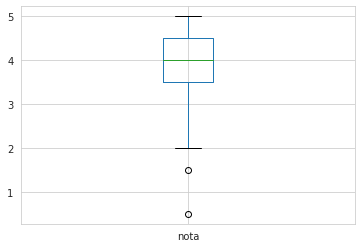

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [0]:
plota_filme2(1)

Olha que legal, diferente do primeiro boxplot, neste os limites superiores não se sobrepõe e temos uma informação a mais, no caso temos essa bolinha localizada em **y=1**. A "bolinha" chamamos de valor discrepante, por ir além dos limites inferior e superior (chamamos na aula de [outliers](https://pt.wikipedia.org/wiki/Outlier), existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

Não vamos entrar em todos os detalhes do boxplot mas recomendo a explicação do [wikipedia](https://pt.wikipedia.org/wiki/Diagrama_de_caixa), ela é muito completa, cheias de exemplo e imagens para facilitar o entendimento.

Agora comparando os boxplot dos dois filmes deixa muito mais evidente as diferenças entre elas, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto. Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas, vamos juntas vários boxplot em uma imagem só. Veja como podemos fazer isso usando o **seaborn**, para aprendermos outra forma de plotar boxplot!


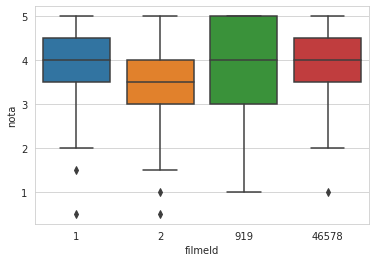

In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

Chamamos o `sns.boxplot()` passando três parâmetros. Parâmetro dados é um dataframe das notas dos filmes com Toy Story, Jumanji, Wizard of Oz e Little miss sunshine (usamos o `.query()` para selecionar os dados), **x** é o Id do filme e **y** as respectivas notas. Agora conseguimos comparar as notas dos filmes de forma muito mais claram tente realiza a análise aí na sua casa!



